<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/NaiveBayes_FinancialFraudData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Step 1: Download dataset
path = kagglehub.dataset_download("aryan208/financial-transactions-dataset-for-fraud-detection")
print("Path to dataset files:", path)

100%|██████████| 277M/277M [00:09<00:00, 29.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/aryan208/financial-transactions-dataset-for-fraud-detection/versions/1


In [3]:
# Step 2: Load dataset
file_path = os.path.join(path, "financial_fraud_detection_dataset.csv")
df = pd.read_csv(file_path)

In [4]:
# Step 3: Select features and target
features = ["device_used", "location", "merchant_category", "transaction_type", "amount"]
target = "is_fraud"

X = df[features]
y = df[target].astype(str)  # Ensure the target is string for classification

In [5]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer

categorical_features = ["device_used", "location", "merchant_category", "transaction_type"]
numeric_features = ["amount"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", KBinsDiscretizer(n_bins=10, encode="onehot-dense", strategy="quantile"), numeric_features)
    ]
)

In [10]:
# Step 6: Create pipeline with Naive Bayes
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", MultinomialNB())
])

In [11]:
# Step 7: Train model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['device_used', 'location',
                                                   'merchant_category',
                                                   'transaction_type']),
                                                 ('num',
                                                  KBinsDiscretizer(encode='onehot-dense',
                                                                   n_bins=10),
                                                  ['amount'])])),
                ('classifier', MultinomialNB())])

In [12]:
# Step 8: Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       0.96      1.00      0.98    964179
        True       0.00      0.00      0.00     35821

    accuracy                           0.96   1000000
   macro avg       0.48      0.50      0.49   1000000
weighted avg       0.93      0.96      0.95   1000000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


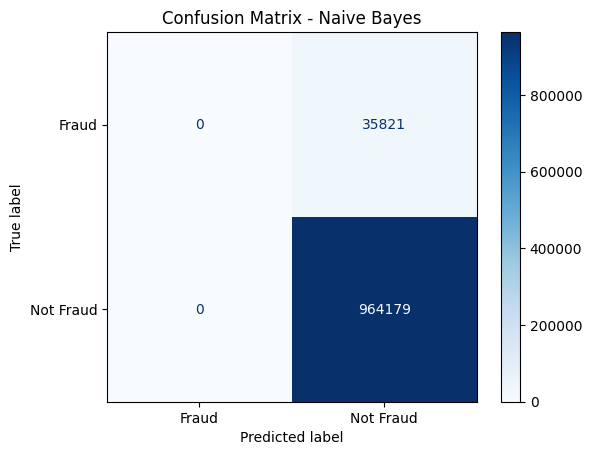

In [13]:
# Step 9: Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred, labels=["True", "False"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fraud", "Not Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()